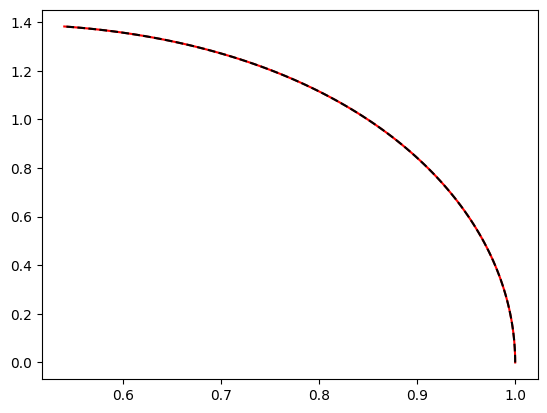

In [1]:
#Test to check the derivatives are correctly computed

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd.functional import jacobian as jac
from torch.func import jacfwd, vmap

q = lambda s : torch.cat([torch.sin(s),s*torch.sin(s)],dim=0).reshape(-1,2)[0]
true_v = lambda s : torch.tensor([torch.cos(s),torch.sin(s) + s*torch.cos(s)])
auto_v = lambda s : vmap(jacfwd(q))(s)
s_vec = torch.linspace(0,1,100).unsqueeze(1)
qq = np.zeros((2,len(s_vec)))
true_vv = np.zeros((2,len(s_vec)))
auto_vv = np.zeros((2,len(s_vec)))
for i in range(len(s_vec)):
  qq[:,i] = q(s_vec[i:i+1]).numpy()
  true_vv[:,i] = true_v(s_vec[i:i+1]).numpy()
  auto_vv[:,i] = auto_v(s_vec[i:i+1]).numpy().reshape(-1)
plt.plot(true_vv[0],true_vv[1],'r-')
plt.plot(auto_vv[0],auto_vv[1],'k--')
plt.show();